# Dependencies

In [2]:
pacman::p_load(factoextra, dplyr)

# Functions

# Paths

In [3]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

# PBMC

In [3]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [4]:
meta_div <- meta_div[ !is.na(meta_div$TRB), ]

In [5]:
meta_div <- meta_div[ meta_div$sampletype == "PBMC",]

In [6]:
head(meta_div)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,Pass,CD3,...,observed_Shannon,estimated_Shannon,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,file,basename,Group,sampletype
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,CHP_10YO_M_00,CHP_10YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,10.591,10.601,0.074,8.556,8.561,0.097,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_10YO-M_PBMC_DNA.txt,CHP_10YO-M_PBMC_DNA,CHP,PBMC
2,CHP_11YO_M_00,CHP_11YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,11.607,11.614,0.055,10.406,10.414,0.074,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_11YO-M_PBMC_DNA.txt,CHP_11YO-M_PBMC_DNA,CHP,PBMC
3,CHP_15YO_F_A_00,CHP_15YO_F_A,X00,NA,NA,NA,Normal,NA,NA,NA,...,8.982,8.989,0.042,8.560,8.570,0.060,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-A_PBMC_DNA.txt,CHP_15YO-F-A_PBMC_DNA,CHP,PBMC
4,CHP_15YO_F_B_00,CHP_15YO_F_B,X00,NA,NA,NA,Normal,NA,NA,NA,...,6.330,6.334,0.039,5.870,5.876,0.059,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-B_PBMC_DNA.txt,CHP_15YO-F-B_PBMC_DNA,CHP,PBMC
5,CHP_15YO_M_00,CHP_15YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,21.110,21.120,0.040,20.321,20.339,0.079,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-M_PBMC_DNA.txt,CHP_15YO-M_PBMC_DNA,CHP,PBMC
6,CHP_16YO_M_00,CHP_16YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,3.972,3.973,0.007,3.944,3.946,0.012,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_16YO-M_PBMC_DNA.txt,CHP_16YO-M_PBMC_DNA,CHP,PBMC


In [7]:
flelist <- file.path(paste0( h4hpath, "/NextSeq/", meta_div$file) )

In [8]:
head(flelist)

[1] "/Users/anabbi/Desktop/H4H/INTERCEPT//NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_10YO-M_PBMC_DNA.txt"  
[2] "/Users/anabbi/Desktop/H4H/INTERCEPT//NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_11YO-M_PBMC_DNA.txt"  
[3] "/Users/anabbi/Desktop/H4H/INTERCEPT//NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-A_PBMC_DNA.txt"
[4] "/Users/anabbi/Desktop/H4H/INTERCEPT//NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-B_PBMC_DNA.txt"
[5] "/Users/anabbi/Desktop/H4H/INTERCEPT//NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-M_PBMC_DNA.txt"  
[6] "/Users/anabbi/Desktop/H4H/INTERCEPT//NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_16YO-M_PBMC_DNA.txt"

In [9]:
Vgene.fx <- function(fle){
    onefle <- read.table(fle, header = T, sep = "\t")
    basename <- gsub(".txt", "", basename(fle))
basename <- gsub("CLONES_TRB", "", basename)
onefle$basename <- basename
# Remove non-productive
onefle <- onefle[!grepl("_", onefle$aaSeqCDR3), ]
onefle <- onefle[!grepl("[*]", onefle$aaSeqCDR3), ]

 # if the file has no productive cdr3, message and exit
 if(nrow(onefle) == 0) { next }

# remove scores and take the first hit
onefle$TRBV <- gsub("[*]0.*", "", onefle$allVHitsWithScore)
onefle$TRBJ <- gsub("[*]0.*", "", onefle$allJHitsWithScore)
# remove super long cdr3s
onefle <- onefle[nchar(onefle$aaSeqCDR3) <= 25, ]

 #exit if the file has no productive cdr3
 if(nrow(onefle) == 0) { next }

onefle$cdr3_length <- nchar(onefle$aaSeqCDR3)
onefle_s <- onefle[, c("basename", "aaSeqCDR3", "cdr3_length", "TRBV", "TRBJ")]

return(onefle_s)
}

In [10]:
myflelist <- lapply(flelist, Vgene.fx)

In [11]:
int_v_j_cdr3_l <- do.call("rbind", myflelist)

In [12]:
readr::write_rds(int_v_j_cdr3_l, paste0(datapath, "capTCRseq/int_pbmc_v_j_cdr3_l.rds"))

In [13]:
# should be done for all files
vfreq <- int_v_j_cdr3_l %>% group_by(TRBV) %>% tally() %>% arrange(desc(n)) %>% mutate(freq = n/sum(n))

In [14]:
head(vfreq)

TRBV,n,freq
<chr>,<int>,<dbl>
TRBV20-1,5549,0.08598435
TRBV19,3277,0.05077865
TRBV5-1,2916,0.04518478
TRBV7-9,2797,0.04334082
TRBV28,2757,0.04272100
TRBV27,2732,0.04233362


In [15]:
tail(vfreq)

TRBV,n,freq
<chr>,<int>,<dbl>
TRBV6-9,19,2.944139e-04
TRBV7-1,15,2.324320e-04
TRBV7-5,14,2.169365e-04
TRBV6-8,13,2.014411e-04
TRBV5-2,2,3.099094e-05
TRBV26,1,1.549547e-05


In [16]:
readr::write_rds(vfreq, paste0(datapath, "capTCRseq/vfreq_int_pbmc.rds"))

In [17]:
summary(vfreq$freq)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000155 0.0025877 0.0120245 0.0163934 0.0233207 0.0859844 

In [18]:
#low frequency V genes
lowfreq_v <- vfreq$TRBV[vfreq$freq < 0.001 ]

In [19]:
lowfreq_v

[1] "TRBV12-2" "TRBV6-7"  "TRBV1"    "TRBV12-1" "TRBV7-4"  "TRBV5-7" 
 [7] "TRBV6-9"  "TRBV7-1"  "TRBV7-5"  "TRBV6-8"  "TRBV5-2"  "TRBV26"

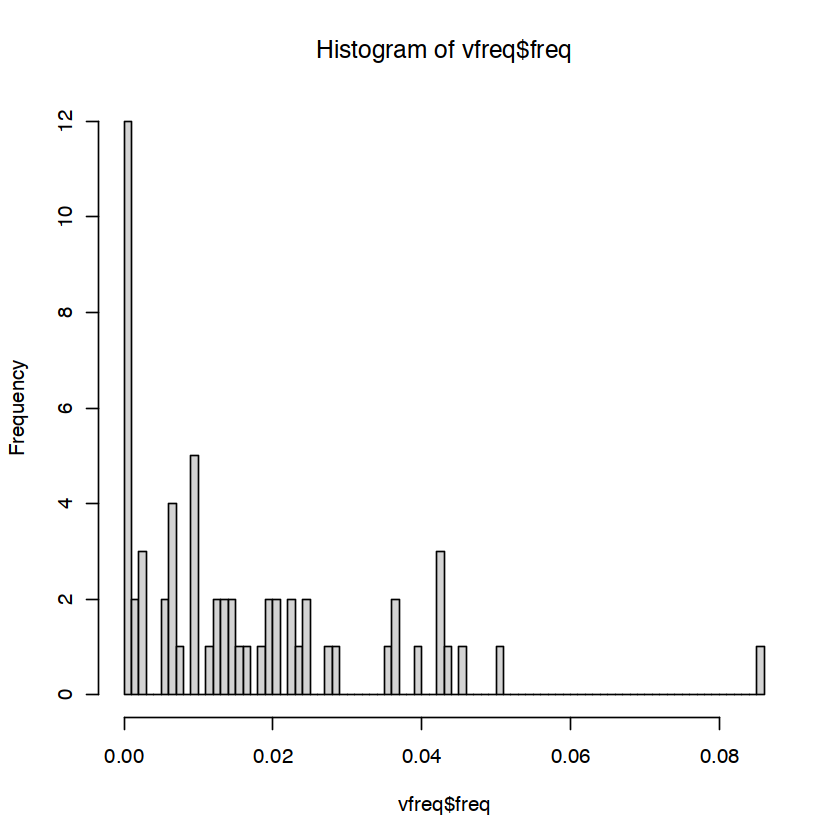

In [20]:
hist(vfreq$freq, breaks = 100)

In [21]:
vgene_mat <- as.data.frame.matrix(table(int_v_j_cdr3_l %>% select(basename, TRBV  )))

In [22]:
head(vgene_mat)

,TRBV1,TRBV10-1,TRBV10-2,TRBV10-3,TRBV11-1,TRBV11-2,TRBV11-3,TRBV12-1,TRBV12-2,TRBV12-3,...,TRBV7-1,TRBV7-2,TRBV7-3,TRBV7-4,TRBV7-5,TRBV7-6,TRBV7-7,TRBV7-8,TRBV7-9,TRBV9
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
CHP-328-04-PBMC-DNA,0,7,3,4,3,10,2,0,3,13,...,0,14,0,0,0,4,2,8,21,11
CHP-328-05-PBMC-DNA,0,1,2,1,0,3,2,0,0,9,...,0,3,3,1,0,1,0,2,2,6
CHP-351-03-PBMC-DNA,1,4,3,24,8,19,4,1,1,29,...,0,23,21,1,0,18,9,13,52,73
CHP-353-04-PBMC-DNA,0,15,12,32,21,34,11,0,0,59,...,0,24,26,0,0,23,3,40,78,83
CHP-363-04-PBMC-DNA,0,3,1,12,2,10,8,0,1,29,...,0,18,11,0,0,9,3,7,33,28
CHP-369-01-PBMC-DNA,0,6,6,18,6,17,2,0,0,21,...,1,8,10,0,0,7,2,2,22,26


In [23]:
readr::write_rds(vgene_mat, paste0(datapath, "capTCRseq/int_pbmc_vgene_matrix.rds"))

In [24]:
# remove lowfreq_v, hf = high freq
vgene_mat_hf <- vgene_mat[, !colnames(vgene_mat) %in% lowfreq_v ]

In [25]:
dim(vgene_mat_hf)

[1] 258  49

In [26]:
dim(vgene_mat)

[1] 258  61

In [27]:
cormat <- cor(vgene_mat_hf)

In [28]:
#vgene_mat_hf[,c("TRBV10-3", "TRBV7-9", "TRBV13")]

In [29]:
summary(as.vector(cormat) )

# generally high correlation

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1002  0.6153  0.7135  0.6937  0.7972  1.0000 

PCA

In [30]:
mypca <- prcomp(vgene_mat_hf, scale = TRUE)

In [31]:
out <- mypca$x
mydf <- data.frame(out)

In [32]:
head(out)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49
CHP-328-04-PBMC-DNA,-4.321728,-0.03212677,-0.8674132,-0.5720319,2.0116468,0.2539799,-0.9105453,0.27941627,-0.4430697,-0.7240545,...,-0.03846443,0.006610509,-0.27729290,0.17840026,-0.21411618,-0.43036180,-0.009790303,-0.24412197,0.31029834,0.03493672
CHP-328-05-PBMC-DNA,1.813318,-0.47595082,-0.6983832,-0.4500168,0.7059845,0.7060431,-0.4387870,0.39149765,0.2029042,0.4762534,...,-0.13661626,0.068570605,0.22334894,0.28242786,-0.11267415,0.21252573,0.136022733,0.20535303,0.08131802,-0.10495953
CHP-351-03-PBMC-DNA,-16.703431,3.16852193,0.9447233,0.6495886,-1.1581014,-1.0061298,-4.0954143,5.25260421,-1.2200082,-2.4059916,...,0.32221663,-0.431435864,-0.04502638,-0.37241404,-0.17000484,0.03092922,-0.054612680,-0.08443263,-0.15691430,0.09631231
CHP-353-04-PBMC-DNA,-28.969007,-3.91092179,-8.4594291,-2.1278024,-3.3761498,1.5486870,0.4049921,-1.93592234,3.8118639,-1.4423686,...,-0.19248382,0.014672908,-0.51183721,-0.04616347,-0.19675278,0.04284492,-0.011685493,0.11843199,0.05597463,0.16759331
CHP-363-04-PBMC-DNA,-9.663401,3.15165741,1.4763998,1.0217333,1.1992817,2.2791147,-0.8674050,-0.12794262,0.7092086,-0.9763820,...,0.38661497,0.164384541,-0.25098190,0.34827781,-0.04840122,0.22162394,0.078737809,0.42797468,0.15594229,-0.04549570
CHP-369-01-PBMC-DNA,-8.448113,-2.29942878,0.2950300,-2.5663195,0.5472186,-0.2208723,0.4169612,0.02371057,-1.2230712,-1.8582157,...,-0.56185823,0.132931233,0.36414564,0.38310917,-0.53532623,-0.12928019,-0.135370535,0.14120180,-0.36708205,0.20002964


In [33]:
p0 <- fviz_pca_ind(mypca,geom = "point", pointshape = 16, pointsize = 2, alpha = 1,
                    ellipse.alpha = 0, invisible="quali", repel = TRUE,
                       title = "PCA of frequent V genes (n = 49)")

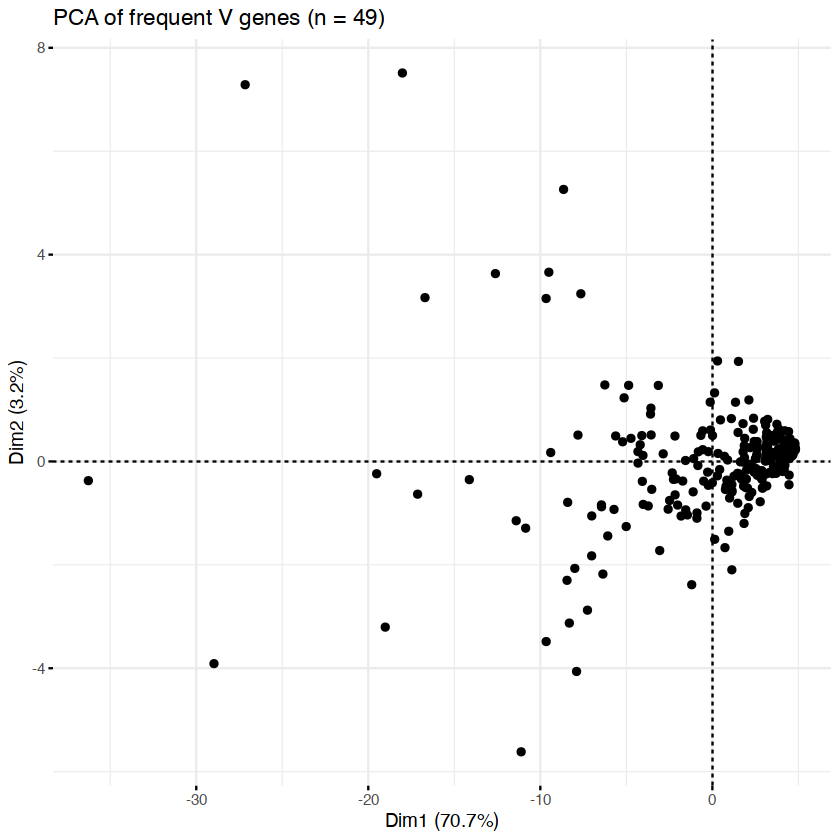

In [34]:
p0

In [35]:
readr::write_rds(mydf, paste0(datapath, "/capTCRseq/INT_PBMC_V_PCA_postqc.rds"))

# cfDNA

In [4]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [5]:
meta_div <- meta_div[ !is.na(meta_div$TRB), ]

In [6]:
meta_div <- meta_div[ meta_div$sampletype == "cfDNA",]

In [7]:
head(meta_div)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,estimated_Shannon,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,basename,file,sampletype,Group,log10shann
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,CHP_323_03,CHP_323,X03,0,786.24,1,HR ALL,0,0,NA,...,43.456,0.145,31.052,31.063,0.159,CHP_323-03_cfDNA,batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_323-03_cfDNA.txt,cfDNA,CHP,1.6377198
2,CHP_323_05,CHP_323,X05,0,979.50,1,HR ALL,0,0,NA,...,8.686,0.093,6.804,6.812,0.134,CHP_323-05_cfDNA,remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_323-05_cfDNA.txt,cfDNA,CHP,0.9380692
3,CHP_324_04,CHP_324,X04,0,0.00,12,T-ALL,0,0,NA,...,1.000,0.000,1.000,1.000,0.000,CHP_324-04_cfDNA,batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_324-04_cfDNA.txt,cfDNA,CHP,0.0000000
4,CHP_324_05,CHP_324,X05,0,0.00,12,T-ALL,0,0,NA,...,1.775,0.019,1.627,1.627,0.028,CHP_324-05_cfDNA,batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_324-05_cfDNA.txt,cfDNA,CHP,0.2491984
5,CHP_326_05,CHP_326,X05,0,972.90,4,SR ALL,0,0,NA,...,16.475,0.087,14.065,14.075,0.099,CHP_326-05_cfDNA,batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_326-05_cfDNA.txt,cfDNA,CHP,1.2165354
6,CHP_328_05,CHP_328,X05,0,91.16,7,SR ALL,0,0,NA,...,3.066,0.028,2.691,2.692,0.024,CHP_328-05_cfDNA,batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_328-05_cfDNA.txt,cfDNA,CHP,0.4864305


In [8]:
flelist <- file.path(paste0( h4hpath, "/NextSeq/", meta_div$file) )

In [9]:
head(flelist)

[1] "/Users/anabbi/Desktop/H4H/INTERCEPT//NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_323-03_cfDNA.txt"          
[2] "/Users/anabbi/Desktop/H4H/INTERCEPT//NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_323-05_cfDNA.txt"
[3] "/Users/anabbi/Desktop/H4H/INTERCEPT//NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_324-04_cfDNA.txt"            
[4] "/Users/anabbi/Desktop/H4H/INTERCEPT//NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_324-05_cfDNA.txt"           
[5] "/Users/anabbi/Desktop/H4H/INTERCEPT//NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_326-05_cfDNA.txt"           
[6] "/Users/anabbi/Desktop/H4H/INTERCEPT//NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_328-05_cfDNA.txt"

In [10]:
Vgene.fx <- function(fle){
    onefle <- read.table(fle, header = T, sep = "\t")
    basename <- gsub(".txt", "", basename(fle))
basename <- gsub("CLONES_TRB", "", basename)
onefle$basename <- basename
# Remove non-productive
onefle <- onefle[!grepl("_", onefle$aaSeqCDR3), ]
onefle <- onefle[!grepl("[*]", onefle$aaSeqCDR3), ]

 # if the file has no productive cdr3, message and exit
 if(nrow(onefle) == 0) { next }

# remove scores and take the first hit
onefle$TRBV <- gsub("[*]0.*", "", onefle$allVHitsWithScore)
onefle$TRBJ <- gsub("[*]0.*", "", onefle$allJHitsWithScore)
# remove super long cdr3s
onefle <- onefle[nchar(onefle$aaSeqCDR3) <= 25, ]

 #exit if the file has no productive cdr3
 if(nrow(onefle) == 0) { next }

onefle$cdr3_length <- nchar(onefle$aaSeqCDR3)
onefle_s <- onefle[, c("basename", "aaSeqCDR3", "cdr3_length", "TRBV", "TRBJ")]

return(onefle_s)
}

In [11]:
myflelist <- lapply(flelist, Vgene.fx)

In [12]:
int_v_j_cdr3_l <- do.call("rbind", myflelist)

In [13]:
head(int_v_j_cdr3_l)

,basename,aaSeqCDR3,cdr3_length,TRBV,TRBJ
,<chr>,<chr>,<int>,<chr>,<chr>
1,CHP_323-03_cfDNA,CASSQGTEGGYTF,13,TRBV4-3,TRBJ1-2
2,CHP_323-03_cfDNA,CSARGRGKGADTQYF,15,TRBV20-1,TRBJ2-3
3,CHP_323-03_cfDNA,CASRSDEKLFF,11,TRBV28,TRBJ1-4
4,CHP_323-03_cfDNA,CAISDGQDTDTQYF,14,TRBV10-3,TRBJ2-3
6,CHP_323-03_cfDNA,CASSPSNTEAFF,12,TRBV19,TRBJ1-1
8,CHP_323-03_cfDNA,CASPGTGLYNQPQHF,15,TRBV30,TRBJ1-5


In [14]:
readr::write_rds(int_v_j_cdr3_l, paste0(datapath, "capTCRseq/int_cfdna_v_j_cdr3_l.rds"))

In [15]:
# should be done for all files
vfreq <- int_v_j_cdr3_l %>% group_by(TRBV) %>% tally() %>% arrange(desc(n)) %>% mutate(freq = n/sum(n)) %>% ungroup()

In [16]:
head(vfreq)

TRBV,n,freq
<chr>,<int>,<dbl>
TRBV20-1,280,0.07510730
TRBV19,245,0.06571888
TRBV5-1,211,0.05659871
TRBV28,173,0.04640558
TRBV6-5,161,0.04318670
TRBV27,155,0.04157725


In [17]:
tail(vfreq)

TRBV,n,freq
<chr>,<int>,<dbl>
TRBV17,1,0.0002682403
TRBV5-7,1,0.0002682403
TRBV6-7,1,0.0002682403
TRBV7-1,1,0.0002682403
TRBV7-4,1,0.0002682403
TRBV7-5,1,0.0002682403


In [18]:
readr::write_rds(vfreq, paste0(datapath, "capTCRseq/vfreq_int_cfdna.rds"))

In [19]:
summary(vfreq$freq)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0002682 0.0049625 0.0112661 0.0172414 0.0235381 0.0751073 

In [20]:
#low frequency V genes
lowfreq_v <- vfreq$TRBV[vfreq$freq < 0.001 ]

In [21]:
lowfreq_v

[1] "TRBV12-1" "TRBV12-2" "TRBV16"   "TRBV17"   "TRBV5-7"  "TRBV6-7"  "TRBV7-1" 
[8] "TRBV7-4"  "TRBV7-5"

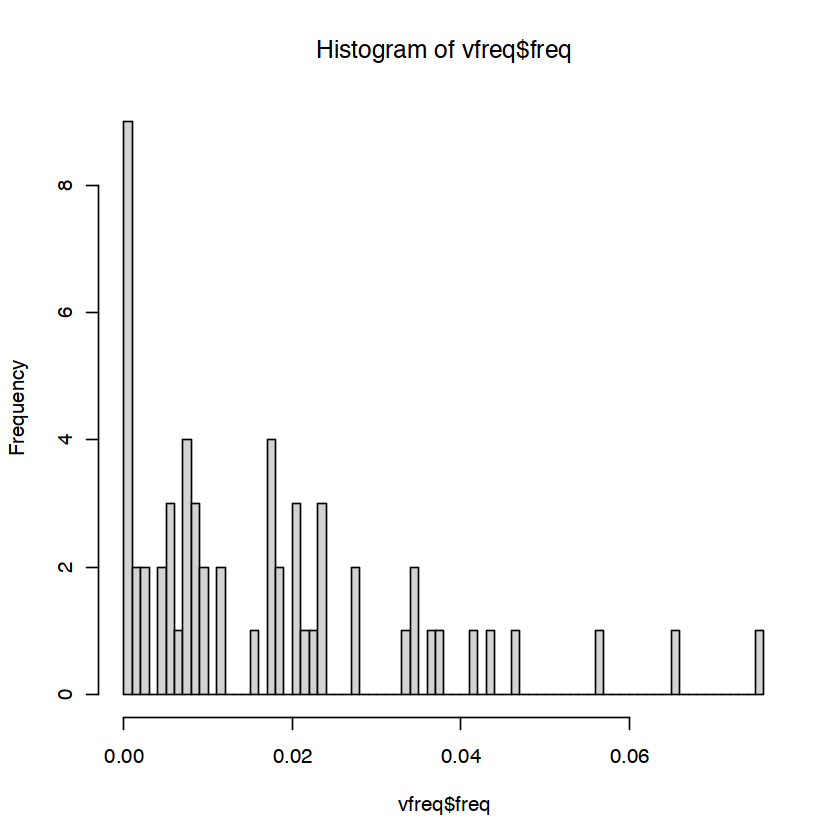

In [22]:
hist(vfreq$freq, breaks = 100)

In [23]:
vgene_mat <- as.data.frame.matrix(table(int_v_j_cdr3_l %>% select(basename, TRBV  )))

In [24]:
head(vgene_mat)

,TRBV1,TRBV10-1,TRBV10-2,TRBV10-3,TRBV11-1,TRBV11-2,TRBV11-3,TRBV12-1,TRBV12-2,TRBV12-3,...,TRBV7-1,TRBV7-2,TRBV7-3,TRBV7-4,TRBV7-5,TRBV7-6,TRBV7-7,TRBV7-8,TRBV7-9,TRBV9
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
CHP_323-03_cfDNA,0,0,0,5,1,4,1,0,0,1,...,0,0,0,0,0,2,1,1,0,9
CHP_323-05_cfDNA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
CHP_324-04_cfDNA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHP_324-05_cfDNA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHP_326-05_cfDNA,0,0,0,1,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,2,0
CHP_328-05_cfDNA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
readr::write_rds(vgene_mat, paste0(datapath, "capTCRseq/int_cfdna_vgene_matrix.rds"))

In [26]:
# remove lowfreq_v, hf = high freq
vgene_mat_hf <- vgene_mat[, !colnames(vgene_mat) %in% lowfreq_v ]

In [27]:
dim(vgene_mat_hf)

[1] 266  49

In [28]:
dim(vgene_mat)

[1] 266  58

In [29]:
cormat <- cor(vgene_mat_hf)

In [30]:
#vgene_mat_hf[,c("TRBV10-3", "TRBV7-9", "TRBV13")]

In [31]:
summary(as.vector(cormat) )

# generally high correlation

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.06903  0.15304  0.28437  0.28838  0.40388  1.00000 

PCA

In [32]:
mypca <- prcomp(vgene_mat_hf, scale = TRUE)

In [33]:
out <- mypca$x
mydf <- data.frame(out)

In [34]:
head(out)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49
CHP_323-03_cfDNA,15.83866850,7.9531074,9.4381691,0.379325530,7.18074505,2.79783019,0.86589009,-2.86544186,-3.158583008,2.03969451,...,0.22108475,-0.23371871,0.53776231,-0.06676863,0.10654426,0.36256247,0.45532059,-0.4183013,-0.6505279,0.09932753
CHP_323-05_cfDNA,0.03694791,0.2037428,0.9895571,-2.176076742,1.07133588,1.43146515,1.35258930,-1.37627872,1.374466861,0.20393558,...,0.72594958,0.73361579,-0.06743142,-0.63041167,-0.13500831,0.53629075,-0.30678681,-0.9411188,0.5512794,0.18748726
CHP_324-04_cfDNA,-2.42588499,-0.2790740,0.1117550,-0.094609098,-0.05604981,0.08629582,0.03522337,-0.18379500,0.003041802,-0.02527073,...,0.11972688,-0.24618071,0.22611405,0.05030421,0.04167489,0.07560319,0.17417859,-0.4981331,-0.3808961,-0.13662565
CHP_324-05_cfDNA,-2.20171492,-0.2392266,0.1373460,-0.001147959,0.24775824,-0.06519060,-0.11251321,-0.10624861,0.365820190,0.15327150,...,-0.09990993,-0.30383943,-0.02730897,0.04507368,-0.01013837,0.11729085,0.03339129,-0.1548399,0.1263361,0.05863072
CHP_326-05_cfDNA,1.53369308,0.6800554,-0.7668898,0.786472419,-1.81313460,-0.95346835,1.14669547,0.08523654,0.030848305,1.03668470,...,-0.04481269,-0.04475912,-0.58740858,-0.19154568,-0.27191197,-0.17300584,-0.05734738,-0.4438526,0.1124433,-0.28540345
CHP_328-05_cfDNA,-1.73881538,-0.8087552,-0.8391630,1.129923007,0.06742512,0.36686128,0.05117531,-0.91311985,0.166227110,0.61812576,...,0.01893665,0.18739052,-0.35927512,0.32878444,0.27062479,0.50372462,0.50081465,0.3196915,0.2104239,-0.16289456


In [35]:
p0 <- fviz_pca_ind(mypca,geom = "point", pointshape = 16, pointsize = 2, alpha = 1,
                    ellipse.alpha = 0, invisible="quali", repel = TRUE,
                       title = "PCA of frequent V genes (n = 49)")

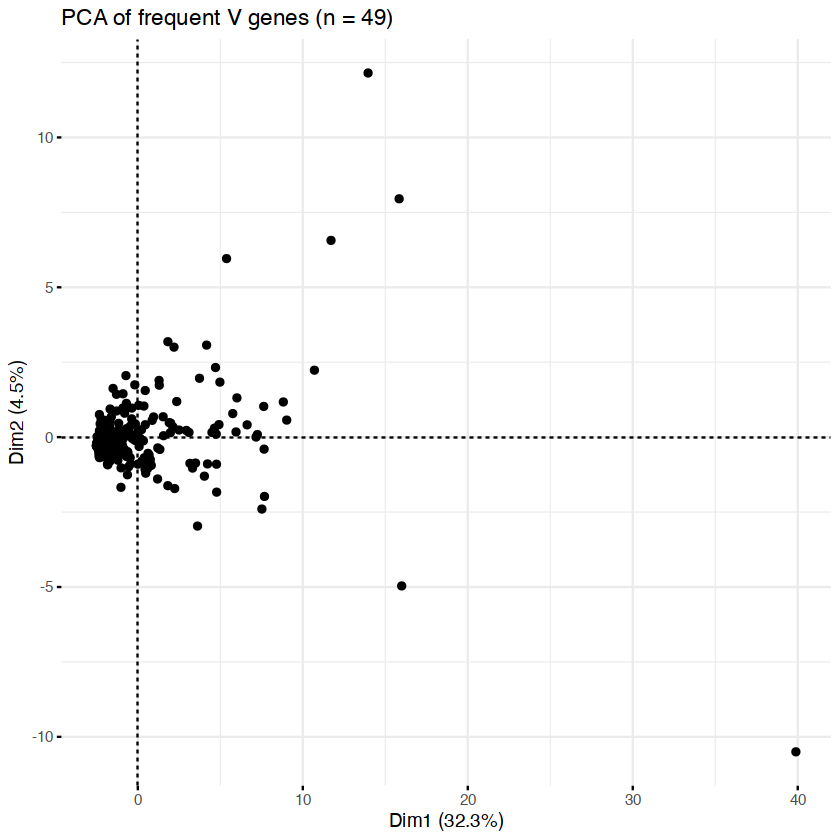

In [36]:
p0

In [37]:
readr::write_rds(mydf, paste0(datapath, "/capTCRseq/INT_cfDNA_V_PCA_postqc.rds"))